filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Import the dataset

In [2]:
df = pd.read_csv('medical_insurance_dataset.csv')
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


# Dataset Description

| **Parameter**      | **Description**                                 | **Content Type**                       |
|--------------------|-------------------------------------------------|----------------------------------------|
| `age`               | Age in years                                    | Integer                                |
| `gender`            | Male or Female                                  | Integer (1 for Female, 2 for Male)     |
| `bmi`               | Body Mass Index                                 | Float                                  |
| `no_of_children`    | Number of children                              | Integer                                |
| `smoker`            | Whether smoker or not                           | Integer (0 for Non-Smoker, 1 for Smoker) |
| `region`            | US Region (NW, NE, SW, SE)                      | Integer (1: NW, 2: NE, 3: SW, 4: SE)   |
| `charges`           | Annual Insurance Charges in USD (Target Column) | Float                                  |


In [3]:
# Add the headers to the dataframe, as mentioned in the project scenario.
headers = ['age', 'gender', 'bmi', 'no_of_children', 'smoker','region', 'charges']
df.columns = headers
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [4]:
# replace the '?' entries with 'NaN' values.
df.replace('?',np.nan,inplace=True)

# Data Wrangling

In [5]:
# identify the columns that have some 'Null' (or NaN) information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


Handle missing data:
* For continuous attributes (e.g., age), replace missing values with the mean.
* For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
* Update the data types of the respective columns.
* Verify the update using df.info().

In [6]:
# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df['age'] = df['age'].replace(np.nan,mean_age)

# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df['smoker'] = df['smoker'].replace(np.nan,is_smoker)

# Update data types
df[['age','smoker']] = df[['age','smoker']].astype('int')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int64  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int64  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


Also note, that the charges column has values which are more than 2 decimal places long. Update the charges column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.

In [7]:
df[['charges']] = np.round(df[['charges']],2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


# Exploratory Data Analysis (EDA)

(0.0, 66902.85800000001)

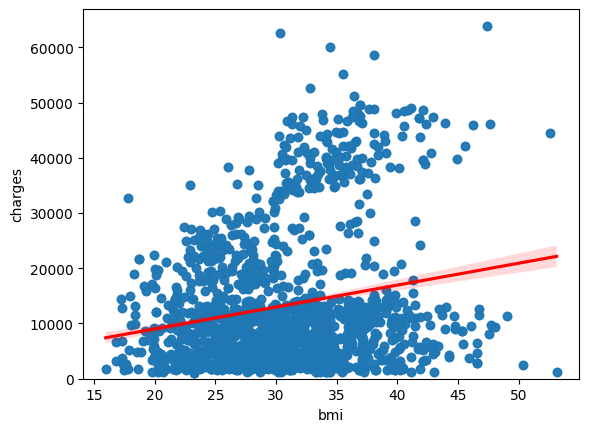

In [8]:
# Implement the regression plot for charges with respect to bmi.
sns.regplot(x='bmi',y='charges',data=df, line_kws={'color':'red'})
plt.ylim(0,)

This plot visualizes the relationship between an individual's **Body Mass Index (BMI)** and their corresponding **insurance charges**.

There is a weak positive correlation between BMI and insurance charges.

<Axes: xlabel='smoker', ylabel='charges'>

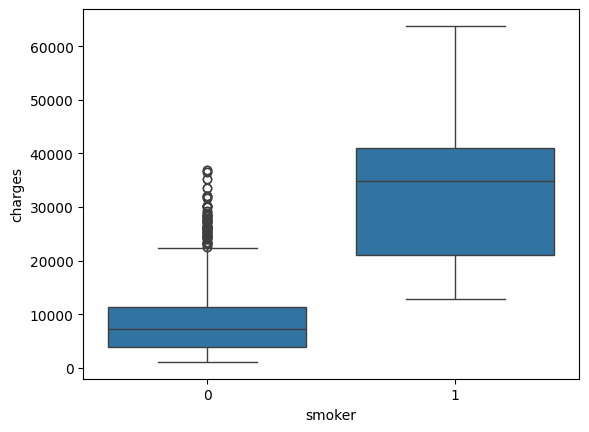

In [9]:
# Implement the box plot for charges with respect to smoker.
sns.boxplot(x='smoker',y='charges',data=df)

This plot visualizes the relationship between an individual's **smoking status** and their corresponding **insurance charges.**

There is a clear difference in insurance charges between smokers and non-smokers. On average, smokers (1) tend to have significantly higher insurance charges compared to non-smokers (0). This suggests that smoking is strongly associated with increased medical costs, likely due to its impact on health.

In [10]:
# Print the correlation matrix for the dataset.
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026584  0.112859        0.037126 -0.022290   
gender         -0.026584  1.000000  0.042766        0.015693  0.083125   
bmi             0.112859  0.042766  1.000000       -0.001642  0.011824   
no_of_children  0.037126  0.015693 -0.001642        1.000000  0.007016   
smoker         -0.022290  0.083125  0.011824        0.007016  1.000000   
region         -0.006969  0.022360  0.271200       -0.025594  0.053839   
charges         0.298892  0.062959  0.199906        0.066551  0.789141   

                  region   charges  
age            -0.006969  0.298892  
gender          0.022360  0.062959  
bmi             0.271200  0.199906  
no_of_children -0.025594  0.066551  
smoker          0.053839  0.789141  
region          1.000000  0.054018  
charges         0.054018  1.000000  


 Correlation Matrix Insights:

 From the correlation matrix, it is evident that **smoking habits (0.789 correlation)** have the strongest impact on insurance charges, followed by **age (0.298)** and **BMI (0.199)**. Other attributes such as **gender**, **region**, and **number of children** show minimal influence on the charges. This indicates that **smoking status is a key driver of insurance costs**.


# Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the smoker attribute of the dataset. Print the
$ R^2 $  score of this model.

In [11]:
x = df[['smoker']]
y = df['charges']
lm = LinearRegression()
lm.fit(x,y)
print(lm.score(x,y)) # R² Score (Coefficient of Determination

0.6227430402464125


R² = 1 → The model explains all the variance.

R² = 0 → The model explains nothing.

### Simple Linear Regression Model (Using 'smoker' only)

A simple linear regression model was trained using only the **'smoker'** attribute to predict insurance charges.

- **R² Score: 0.6227**

- This indicates that **approximately 62% of the variation in insurance charges can be explained by smoking status alone**.
- Smoking is thus a **major predictor of insurance costs**, even when used as a single feature.


---



Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.

In [12]:
z = df[['age','gender','bmi','no_of_children','smoker','region']]
lm.fit(z,y)
print(lm.score(z,y))

0.7505888664568174


 ### Multiple Linear Regression Model (Using All Features)
A multiple linear regression model was trained using all available attributes to predict insurance charges.

- **R² Score: 0.7505**
- This indicates that approximately **75% of the variance in insurance charges can be explained by the selected features**.
- Compared to the single-variable model (using only 'smoker'), this model shows a notable improvement in performance.


---



Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.

In [13]:
# y and z use the same values as defined in previous cells
input = [('scale',StandardScaler()),
         ('polynomial',PolynomialFeatures(include_bias=False)),
         ('model',LinearRegression())]
pipe = Pipeline(input)
z = z.astype(float)
pipe.fit(z,y)

ypipe = pipe.predict(z)

print(r2_score(y,ypipe))

0.8453719105568606


### Polynomial Regression Model (Pipeline Approach)
A regression model was built using a **Pipeline** that includes:
1. **StandardScaler** for feature scaling.
2. **PolynomialFeatures (degree=2)** for capturing non-linear interactions.
3. **LinearRegression** for fitting the transformed data.

- **R² Score: 0.8453**
- This model explains approximately **84.5% of the variance in insurance charges**, showing a significant improvement over the simple linear models.


---



# Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

In [14]:
# z and y hold same values as in previous cells
x_train,x_test,y_train,y_test = train_test_split(z,y,test_size=0.2,random_state=1)

Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.

In [15]:
# x_train,x_test,y_train,y_test hold same values as in previous cells
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.7254198858412229


### Ridge Regression Model (α = 0.1)
A Ridge Regression model was trained with **alpha=0.1** to address potential overfitting.

- **R² Score on Test Data: 0.7254**
- The Ridge model demonstrates solid generalization by explaining **72.5% of the variance on unseen test data**.
- Regularization helps in balancing model complexity and prediction stability.


---



Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.

In [16]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
RidgeModel.fit(x_train_pr,y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.8208413195172478


### Polynomial Ridge Regression Model (Degree=2, α=0.1)
A Polynomial Ridge Regression model was developed to enhance performance while reducing overfitting:

- PolynomialFeatures (degree=2) were applied to capture complex interactions.
- Ridge Regularization (α=0.1) was used to stabilize the model.
- **R² Score on Test Data: 0.8208**

This indicates that the model explains approximately **82% of the variance on unseen test data**, showcasing a significant improvement in both accuracy and generalization.



---

# Predicting Insurance Charges for New Individuals
In this final section, i demonstrate how the trained Polynomial Ridge Regression model can be used to estimate insurance charges for new individuals based on their personal attributes (age, BMI, smoking status, etc.).

The model uses PolynomialFeatures(degree=2) to capture nonlinear interactions.

Regularization via Ridge(alpha=0.1) helps maintain generalization.

Example predictions include:

- A young non-smoker

- A middle-aged smoker with children

- A healthy middle-aged non-smoker

This demonstrates the practical use of the model for real-world prediction scenarios.



In [21]:
# Define new individuals with their features: [age, gender, bmi, children, smoker, region]
new_data = pd.DataFrame([
  [25,2,28.0,0,0,3], # 👦🏽🧘🏻‍♂️ Non-smoker young male, healthy BMI
  [52, 1, 32.5, 2, 1, 1], # 👩🏼‍🦳🚬👶🏼👶🏼 Middle-aged female smoker with children
   [43, 2, 30.1, 1, 0, 2]  # 👨🏽‍💼💪🏼🍼 Middle-aged non-smoker male with normal BMI
],columns = z.columns)

new_data = new_data.astype(float)

# Apply the same polynomial transformation used during training
new_data_pr = pr.transform(new_data)

# Predict insurance charges using the trained Ridge regression model
predicted_charges = RidgeModel.predict(new_data_pr)

# Display predictions for each person
for i, charge in enumerate(predicted_charges):
    print(f"Estimated Insurance Charge for Person {i+1}: ${charge:.2f}")

Estimated Insurance Charge for Person 1: $3758.35
Estimated Insurance Charge for Person 2: $39728.76
Estimated Insurance Charge for Person 3: $9180.83


These results reflect the model’s ability to generalize predictions to previously unseen cases using Polynomial Ridge Regression.

